# Assignment: Clustering and Association

## I. Business Understanding

Customer is a drone delivery company that is looking for away to optimize its operations. The company has a fleet of drones that deliver products to customers. The company intends to create a set of hubs, or depots, where the drones are stationed, serviced, and loaded with products for delivery. The company is looking to optimize its operations by finding the optimal locations for its hubs.

Another optimization idea is to increase the revenue of the company by recommending products to customers based on their purchase history.

---

## II. Data Understanding

We have two data sets [drone_cust_locations.csv](https://github.com/vesavvo/dkko/blob/main/datasets/drone_delivery/drone_cust_locations.csv) and [drone_prod_groups.csv](https://github.com/vesavvo/dkko/blob/main/datasets/drone_delivery/drone_prod_groups.csv) both from [Vesa Ollikainen](https://github.com/vesavvo).

drone_cust_locations.csv dataset contains the locations of customers. The dataset has the following columns:
- ```client_id``` -> Identifier for customer
- ```x``` -> The x coordinate of the customer's location, when plotted into a 2D plane
- ```y``` -> The y coordinate of the customer's location, when plotted into a 2D plane

drone_prod_groups.csv dataset contains the sales data for products. The dataset has the following columns:
- ```ID``` -> Transaction id
- ```Prod1, ..., Prod20``` -> Binary variables indicating whether at least one product from a particular group was purchased in the transaction. A value of 1 indicates that at least one product from the group was purchased, while a value of 0 indicates that no products from the group were purchased.

Data has no missing values.


In [1]:
import pandas as pd

# Import dataset Drone cust locations
df = pd.read_csv('../data/drone_cust_locations.csv', sep=';')
# Import dataset Drone production groups
df2 = pd.read_csv('../data/drone_prod_groups.csv')

## III. Data Preparation

- **Drone curst locations:** We drop id column from drone_cust_location dataset and prepare scatterplot figure from it.
- **Product groups:** mlextend requires the data to be boolean format before applying the Apriori algorithm. We can drop the ID column, as it is not needed for the analysis

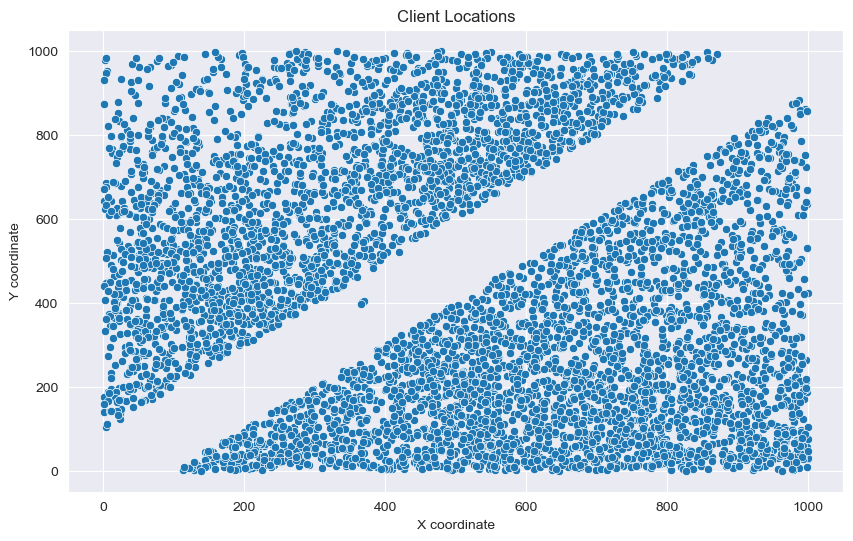

Figure 1: Coordinate data visualized to two dimensional scatterplot.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Drop client id and product id columns
df = df.drop(columns='clientid')
df2 = df2.drop(columns='ID')

# replace integers to booleans
df2 = df2.astype(bool)

# Visualize coordinate data
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['x'], y=df['y'])
plt.title('Client Locations')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()
print("Figure 1: Coordinate data visualized to two dimensional scatterplot.")

Looking by datapoints it seems almost like there is road or river or some obstacle between them.

---

## IV. Modeling


In [3]:
# Choosing number clusters (depots), you may change this value depending how many depots you like
n_clusters = 3

# Fitting KMeans model with data
model = KMeans(init='random', n_clusters=n_clusters, random_state=43)
model.fit(df)


KMeans(init='random', n_clusters=3, random_state=43)

In [4]:
# Get the cluster labels and centroids
labels = model.labels_
centroids = model.cluster_centers_

# Attach information of closet depot to each client
df['depot'] = labels

# Print sample of datapoints with depot included
print(df.head(10))

            x           y  depot
0  622.771572  164.857623      2
1  416.357298  630.193634      0
2  292.735020  567.333231      1
3  737.211288  166.225676      2
4  540.475375  682.912298      0
5  535.469492  318.439661      2
6  640.380050  870.833221      0
7  235.772075  359.048203      1
8  481.896884  661.491838      0
9  730.032789  312.177817      2


Sample of dataset where depot has added to each column.

---



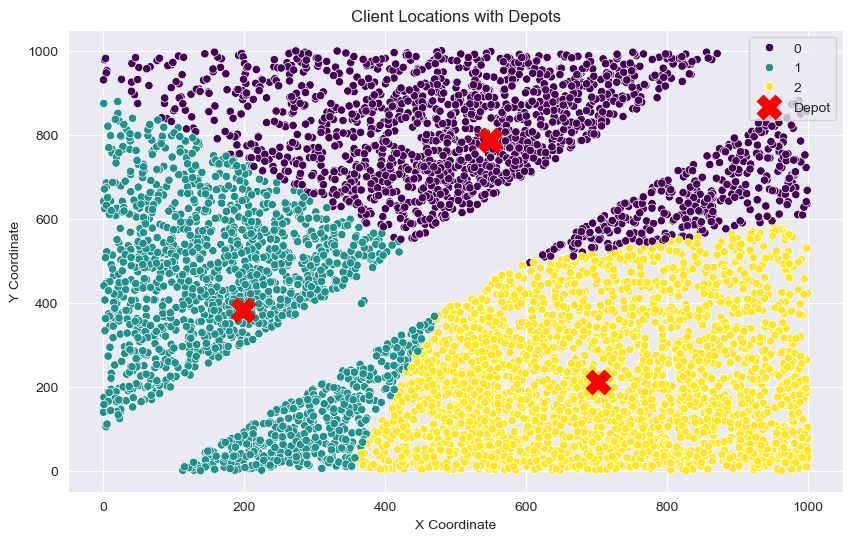

Figure 2: Scatterplot of clients colored by their depot and X serves as optimal location for depot


In [5]:
# Visualization of datapoints colored by their cluster in scatterplot with cluster centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['depot'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Depot')
plt.title('Client Locations with Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
print("Figure 2: Scatterplot of clients colored by their depot and X serves as optimal location for depot")

#### Finding frequent itemsets in product groups

In [6]:
# find frequent itemsets
frequent_itemsets = apriori(df2, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.10998,(Prod1)
1,0.13098,( Prod2)
2,0.10459,( Prod5)
3,0.13499,( Prod7)
4,0.16179,( Prod8)
5,0.19853,( Prod9)
6,0.10848,( Prod11)
7,0.15971,( Prod12)
8,0.14557,( Prod14)
9,0.11880,( Prod15)


## V. Evaluation


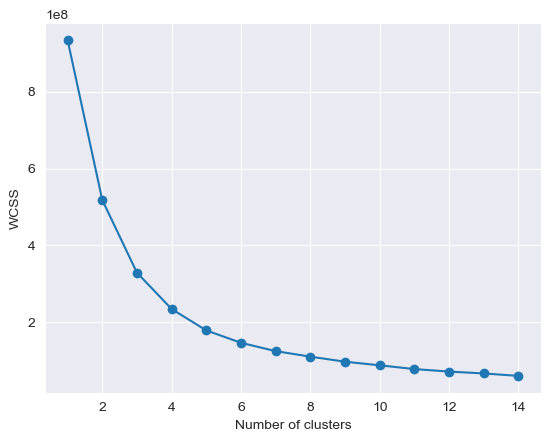

Figure 3: Inertia of clustering or within-cluster sum of squared distances WCSS


In [7]:
import matplotlib.pyplot as plt

# Clustered dataset with different k values
wcss = []
for i in range(1,15):
    model = KMeans(init='random', n_clusters=i, random_state=45).fit(df)
    wcss.append(model.inertia_)

plt.plot(range(1,15), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("Figure 3: Inertia of clustering or within-cluster sum of squared distances WCSS")

From figure 3 we can see that optimal numbers of depots would be 4 or 5.

##### Test for KMeans clustering model fitting times

In [15]:
import time

# Function to fit k-means and measure computation time
def fit_kmeans(clusters):
    start_time = time.time()
    mod = KMeans(init='random', n_clusters=clusters, random_state=42)
    mod.fit(df)
    end_time = time.time()
    return end_time - start_time

# Test with different number of clusters
for n in [3, 5, 10]:
    duration = fit_kmeans(n)
    print(f'Number of depots: {n}, Computation time: {duration:.4f} seconds')

Number of depots: 3, Computation time: 0.0826 seconds
Number of depots: 5, Computation time: 0.0625 seconds
Number of depots: 10, Computation time: 0.1114 seconds


From print above we can see computational time for 3, 5 and 10 clusters. We noticed that computation time is varying alot, but usually with 3 clusters time is smalles and with 10 cluster highest.

This might occur because the specific distribution of data points can influence how quickly the algorithm converges. Some configurations of centroids may lead to faster convergence for certain numbers of clusters.

##### Testin for Hieararchial clustering model fitting times

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Function to fit  agglomerative hierarchical clustering and measure computation time
def fit_agglomerative(clusters):
    start_time = time.time()
    mod = AgglomerativeClustering(n_clusters=clusters)
    label = mod.fit_predict(df)
    end_time = time.time()
    return label, end_time - start_time

# Test with different number of clusters
for n in [3, 5, 10]:
    labels, duration = fit_agglomerative(n)
    print(f'Number of depots: {n}, Computation time: {duration:.4f} seconds')

Number of depots: 3, Computation time: 0.9347 seconds
Number of depots: 5, Computation time: 0.8452 seconds
Number of depots: 10, Computation time: 0.8882 seconds


From above print, we can see computational times for fitting hierarchical cluster model with 3, 5 and 10 clusters (depots). Results by running model looks like that fitting is slowest with 3 clusters compares to 5 and 10. Result vary a lot.

##### Silhouette scores for KMeans model in range of 2 to 10 clusters

In [17]:
from sklearn.metrics import silhouette_score

# Silhouette score

for n in range(2, 11):
    model = KMeans(init='random', n_clusters=n, random_state=42).fit(df)
    labels = model.labels_
    print(f'Silhouette score for {n} clusters = %.2f' % silhouette_score(df, labels))

Silhouette score for 2 clusters = 0.42
Silhouette score for 3 clusters = 0.42
Silhouette score for 4 clusters = 0.40
Silhouette score for 5 clusters = 0.42
Silhouette score for 6 clusters = 0.40
Silhouette score for 7 clusters = 0.39
Silhouette score for 8 clusters = 0.39
Silhouette score for 9 clusters = 0.39
Silhouette score for 10 clusters = 0.37


From results of silhouette score and computational time, model works best with 5 clusters.

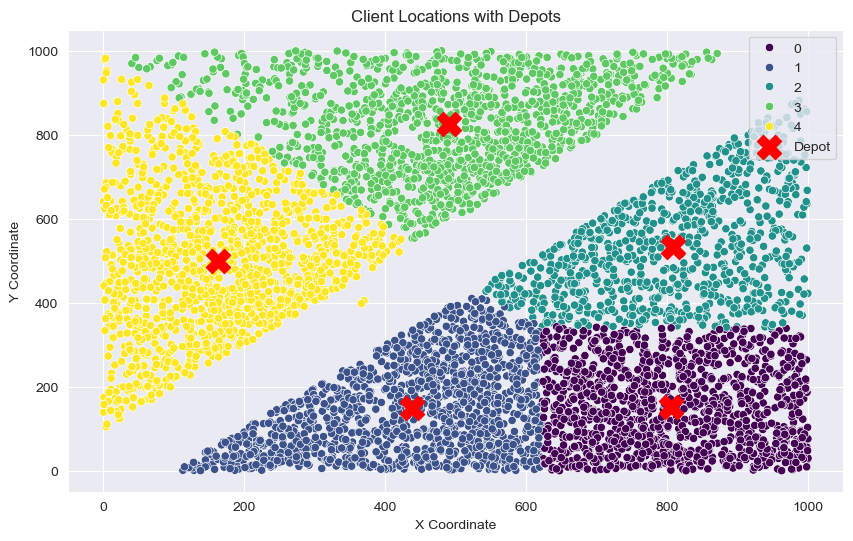

Figure 4: Scatterplot of optimized KMeans model fitted with 5 clusters and cluster centroids


In [11]:
# Fitting model with optimal number of clusters
model = KMeans(init='random', n_clusters=5, random_state=43)
model.fit(df)
labels = model.labels_
centroids = model.cluster_centers_
df['depot'] = labels

# Final visualization of optimized KMeans model with 5 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['depot'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Depot')
plt.title('Client Locations with Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
print('Figure 4: Scatterplot of optimized KMeans model fitted with 5 clusters and cluster centroids')

In [12]:
# generate association rules for products
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# sort in descending order of confidence
rules = rules.sort_values(by='confidence', ascending=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,( Prod15),( Prod9),0.11880,0.19853,0.11145,0.938131,4.725388,1.0,0.087865,12.954372,0.894663,0.541335,0.922806,0.749754
3,( Prod20),( Prod19),0.14798,0.20626,0.13476,0.910664,4.415125,1.0,0.104238,8.884845,0.907849,0.613997,0.887449,0.782007
2,( Prod19),( Prod20),0.20626,0.14798,0.13476,0.653350,4.415125,1.0,0.104238,2.457869,0.974508,0.613997,0.593144,0.782007
0,( Prod9),( Prod15),0.19853,0.11880,0.11145,0.561376,4.725388,1.0,0.087865,2.009011,0.983664,0.541335,0.502243,0.749754


Lift is a metric that tells how many times more likely the items are to be purchased together than if they were independent.

- Products {15, 9} have a lift of 4.7.
- Products {20, 19} have a lift of 4.4.

## VI. Deployment

The  optimized KMeans model with 5 clusters will perform well and can be deployed to optimize the drone delivery operations.

### Recommendation

- To increase revenue the company should offer combo deals containing {Prod 15, Prod 9} and {Prod 20, Prod 19}
- Place these products near each other to make joint purchases more convenient.
